<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras - simple model</h2>


! pip install -U tensorflow tensorboard

In [1]:
import os
import sys
import re
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary

from google.protobuf import struct_pb2

%load_ext tensorboard
%matplotlib inline

2021-10-01 17:11:12.607701: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

2.4.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2021-10-01 17:11:14.023334: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 17:11:14.038155: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-01 17:11:14.152696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 17:11:14.153216: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.90GiB deviceMemoryBandwidth: 510.07GiB/s
2021-10-01 17:11:14.153290: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-01 17:11:14.362082: I tensorflow/stream_executor/platform/default/dso_load

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

First we'll develop a small ANN with Keras:

In [4]:
# load pima indians dataset
dataset = np.loadtxt("../../../data/pima-indians-diabetes.csv", delimiter=",")

In [5]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [6]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers
#https://www.tensorflow.org/api_docs/python/tf/keras/activations
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics

# create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2021-10-01 17:11:15.733201: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 17:11:15.733690: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 17:11:15.733913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 17:11:15.734899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.90GiB deviceMemoryBandwidth: 510.07GiB/s
2021-10-01 17:11:15.735016:

In [7]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=10, verbose=1)

2021-10-01 17:11:24.028979: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-01 17:11:24.088585: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


Epoch 1/200


2021-10-01 17:11:25.130840: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-01 17:11:30.347644: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


52/52 [==============================] - 8s 17ms/step - loss: 0.6902 - accuracy: 0.6375 - val_loss: 0.6672 - val_accuracy: 0.6732
Epoch 2/200
52/52 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.6376 - val_loss: 0.6581 - val_accuracy: 0.6732
Epoch 3/200
52/52 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.6643 - val_loss: 0.6541 - val_accuracy: 0.6732
Epoch 4/200
52/52 [==============================] - 0s 5ms/step - loss: 0.6495 - accuracy: 0.6741 - val_loss: 0.6511 - val_accuracy: 0.6732
Epoch 5/200
52/52 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 0.6574 - val_loss: 0.6482 - val_accuracy: 0.6732
Epoch 6/200
52/52 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.6205 - val_loss: 0.6431 - val_accuracy: 0.6732
Epoch 7/200
52/52 [==============================] - 0s 4ms/step - loss: 0.6625 - accuracy: 0.6023 - val_loss: 0.6391 - val_accuracy: 0.6850
Epoch 8/200
52/52 [=====

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


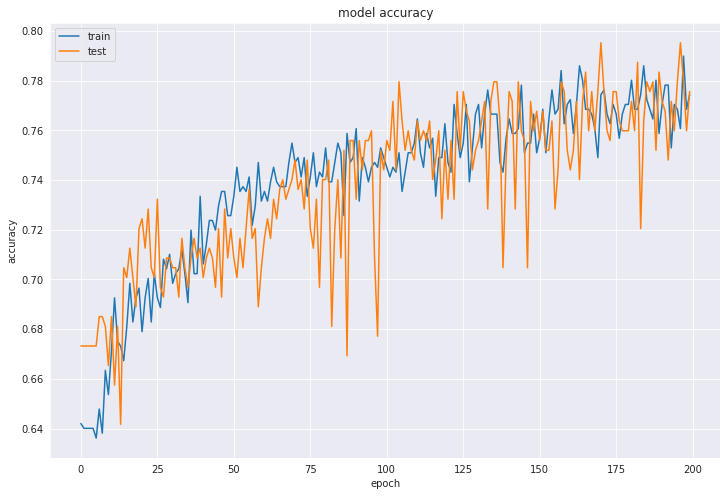

In [9]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

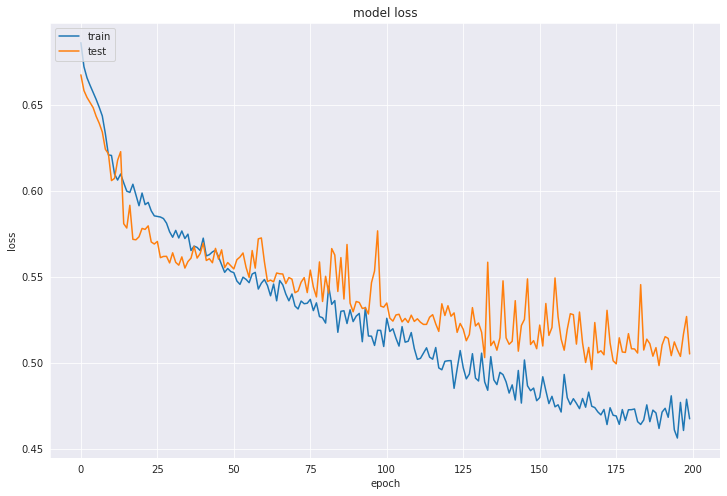

In [10]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 4ms/step - loss: 0.4686 - accuracy: 0.7734

accuracy: 77.34375


In [12]:
# calculate predictions
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

for pred in list(zip(predictions[0:10], rounded[0:10])):
    print(pred)

(array([0.47275323], dtype=float32), 0)
(array([0.15979014], dtype=float32), 0)
(array([0.89653623], dtype=float32), 1)
(array([0.1185171], dtype=float32), 0)
(array([0.7905802], dtype=float32), 1)
(array([0.2040695], dtype=float32), 0)
(array([0.26660138], dtype=float32), 0)
(array([0.7187257], dtype=float32), 1)
(array([0.4811187], dtype=float32), 0)
(array([0.2917553], dtype=float32), 0)
